# Attempting some basic aperture photometry (yeet)

Based on method used in previous source detection test

First up, dependencies:

In [21]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from astropy.table import Table
from astropy.table import Column
from photutils import DAOStarFinder
from photutils import CircularAperture, CircularAnnulus
from photutils import aperture_photometry
from matplotlib.colors import LogNorm
#from astropy.visualization import SqrtStretch
#from astropy.visualization.mpl_normalize import ImageNormalize

Importing .fits file and extracting the ~ *data* ~:

In [22]:
image_file = 'data/PAL5/PAL5__e1/PAL5__e1_3p6um.fits'
image_data = fits.getdata(image_file, ext=0)
#print(image_data.shape)

hdu_list = fits.open(image_file)
hdr = hdu_list[0].header
#data = hdu_list[0].data   # could open data here instead of fits.getdata above, more consistent
gain = hdr['GAIN']         # don't need gain any more
exptime = hdr['EXPTIME']
fluxconv = hdr['FLUXCONV']
print(gain, exptime, fluxconv)
hdu_list.close()

data = image_data * exptime / fluxconv

3.7 71.3724 0.1257


Locating the objects in the image using DAOStarFinder, and plotting no. of stars detected vs. sigma curve:

In [23]:
#def detect_sources(data, sigma_level, FWHM):
#    daofind = DAOStarFinder(threshold = sigma_level * std, fwhm=FWHM)
#    sources = daofind(data - median)
#    return sources

In [24]:
mean, median, std = sigma_clipped_stats(data, sigma=4.) # don't need mean any more?

#detect_sources(data, sigma_level=5., FWHM=3.)
#for col in sources.colnames:
#    sources[col].info.format = '%.8g'
#print(sources)

#for i in range(1, 8):
#    detect_sources(data, sigma_level=float(i), FWHM=3.)
#    print(len(sources))

no_detected = []
sigma_vals = []
 
#for i in np.arange(1., 15.5, 0.5):
#    #print(i)
#    daofind = DAOStarFinder(threshold = i * std, fwhm = 3.)
#    sources = daofind(data - median)
#    #print(len(sources))
#    
#    no_detected.append(len(sources))
#    sigma_vals.append(i)
#
#print(no_detected)
#print(sigma_vals)

In [25]:
#plt.plot(sigma_vals, no_detected)
#plt.xlabel('sigma')
#plt.ylabel('number of sources detected')
#plt.grid(True)
#plt.savefig('images/sigma_curve_01.png', dpi=100)

Adding the centroid positions of the objects to an array and fitting circular apertures and annuli around them:

C:\Users\Jake\anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


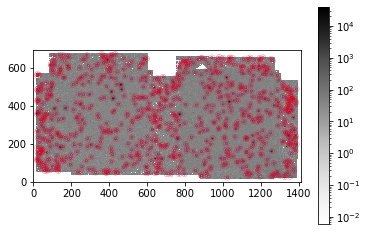

In [26]:
daofind = DAOStarFinder(threshold = 4. * std, fwhm = 3.)  # 4 sigma seems ideal to me
sources = daofind(data - median)

pos = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(pos, r=6.)
annuli = CircularAnnulus(pos, r_in=6., r_out=14.)
all_apers = [apertures, annuli]
norm = LogNorm()
plt.imshow(data, cmap='Greys', origin='lower', norm=norm, interpolation='nearest')
plt.colorbar()
apertures.plot(color='blue', lw=.5, alpha=.5)
annuli.plot(color='red', lw=.5, alpha=.5)

#plt.title('4 sigma')
#plt.savefig('images/sigma_4.png', dpi=500)

Performing some basic aperture photometry, summing the pixel brightness values (fluxes?) inside each aperture and annulus:

(Note: 'nan' values for apertures could be where the objects are too close to the edge of the image and use some pure white in their summation, and those for the annuli might be where annuli overlap?)

In [27]:
phot_table = aperture_photometry(data, all_apers)
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'
print(phot_table)

 id  xcenter   ycenter  aperture_sum_0 aperture_sum_1
       pix       pix                                 
--- --------- --------- -------------- --------------
  1 1024.1238 20.941648            nan            nan
  2 1325.4604 23.872315            nan            nan
  3 1192.4357 25.456584      5434.4619            nan
  4 1354.0155 25.685976      8417.7062            nan
  5 922.50229  27.83391      3799.6658            nan
  6 1252.8213 27.402609      6844.4969            nan
  7 1267.5156 27.409215      9601.4638            nan
  8 1138.0928 29.013273      8133.9913            nan
  9 1299.9964 29.593637        14567.2            nan
 10 886.42265 31.361777            nan            nan
...       ...       ...            ...            ...
826 405.85351 660.12522      7561.8442      33830.855
827  109.2214  663.1176            nan            nan
828 180.25769 662.85865      6766.5579      24182.691
829 419.36802 664.61244      9524.1159            nan
830 157.39784 666.59708     

Finding which star coordinates are giving me attitude and plotting them:

663
172 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 16, 17, 19, 20, 23, 24, 25, 27, 28, 29, 30, 31, 33, 34, 35, 36, 39, 40, 44, 45, 48, 51, 52, 55, 58, 62, 79, 84, 93, 116, 123, 127, 136, 165, 166, 170, 184, 195, 200, 205, 225, 228, 233, 236, 251, 266, 270, 288, 297, 300, 306, 311, 325, 332, 333, 367, 376, 404, 413, 418, 421, 430, 436, 439, 448, 455, 488, 499, 500, 505, 507, 519, 578, 583, 586, 590, 591, 593, 597, 598, 601, 606, 610, 617, 619, 623, 645, 654, 655, 660, 670, 672, 678, 683, 684, 689, 692, 694, 695, 701, 705, 715, 716, 718, 721, 723, 726, 731, 733, 735, 737, 739, 740, 744, 746, 748, 749, 750, 754, 756, 758, 761, 763, 769, 772, 776, 777, 779, 780, 781, 782, 784, 788, 791, 793, 800, 802, 804, 805, 806, 809, 810, 811, 812, 814, 815, 816, 817, 819, 820, 822, 823, 827, 829, 830, 831, 832, 833, 834, 835]


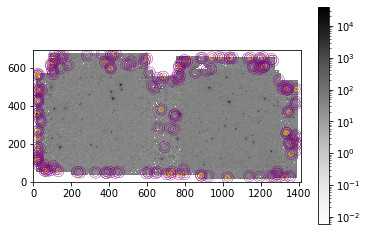

In [37]:
fail_test_x_ap = []
fail_test_y_ap = []
fail_test_x_an = []
fail_test_y_an = []
fail_test_id = []
nice_data = []

# could instead do annulus first, then 'elif' aperture
for i in range(0, len(phot_table)):
    if np.isnan(phot_table['aperture_sum_0'][i]) == True:
        fail_test_x_ap.append(phot_table['xcenter'][i].value)
        fail_test_y_ap.append(phot_table['ycenter'][i].value)
    if np.isnan(phot_table['aperture_sum_1'][i]) == True:
        fail_test_x_an.append(phot_table['xcenter'][i].value)
        fail_test_y_an.append(phot_table['ycenter'][i].value)
        fail_test_id.append(phot_table['id'][i])
    else:
        nice_data.append(phot_table[:][i])

fail_test_all_ap = np.column_stack((fail_test_x_ap, fail_test_y_ap))
fail_test_all_an = np.column_stack((fail_test_x_an, fail_test_y_an))
aperture_fails = CircularAperture(fail_test_all_ap, r=10.)
annulus_fails = CircularAnnulus(fail_test_all_an, r_in=20., r_out=30.)
#print(len(aperture_fails), len(annulus_fails))

#print(fail_test_all_ap)
#print(fail_test_all_an)
print(len(nice_data))
print(len(fail_test_id), fail_test_id)

plt.imshow(data, cmap='Greys', origin='lower', norm=norm, interpolation='nearest')
plt.colorbar()
aperture_fails.plot(color='orange', lw=.7, alpha=1.)
annulus_fails.plot(color='purple', lw=.4, alpha=1.)

#plt.savefig('images/ap_photom_fail_stars_04.png', dpi=500)

'nanmask' method creates a table of true/false values depending on which stars give me nans, and yeets them out of the data (~ operator inverts true -> false and vice-versa):

In [29]:
nanmask_ap = ~np.isnan(phot_table['aperture_sum_0'])
#nanmask_an = ~np.isnan(phot_table['aperture_sum_1'])
first_mask = phot_table[nanmask_ap] # all nans in central apertures will also be present in the annuli, so can just base 
                                    # our data on the annuli masks (though implementing a check for both would be ideal)
#print(first_mask)

nanmask_an = ~np.isnan(first_mask['aperture_sum_1'])
final_data = first_mask[nanmask_an]

print(final_data)

 id  xcenter   ycenter  aperture_sum_0 aperture_sum_1
       pix       pix                                 
--- --------- --------- -------------- --------------
 12 1327.4473 35.911661      8478.4609       58726.32
 14 1123.3365 37.157777      5804.9773      24588.348
 15 1273.3191 37.641682      7155.7357      70357.911
 18 1263.0964 39.632207      7991.2857      30179.302
 21  910.3288  40.83291      6110.9349       20298.73
 22 1149.9531 41.553642      20198.146      25427.829
 26 1342.9128 45.770859      22348.105      36349.914
 32 1127.5115 47.616697      9448.1562      25453.819
 37 1132.3676 49.803702      11110.936       24214.98
 38 912.56694 51.583555      5726.6388      21381.769
...       ...       ...            ...            ...
801 1107.4805 644.66825      3516.1178      18336.916
807 384.05553 649.72226      10653.533      166121.08
808 473.88464 649.19729      4833.2529      20640.397
813 582.88391 650.44854      24302.593      24695.393
818 365.91776 654.02199     

Re-doing the aperture fittings ignoring the problem stars:

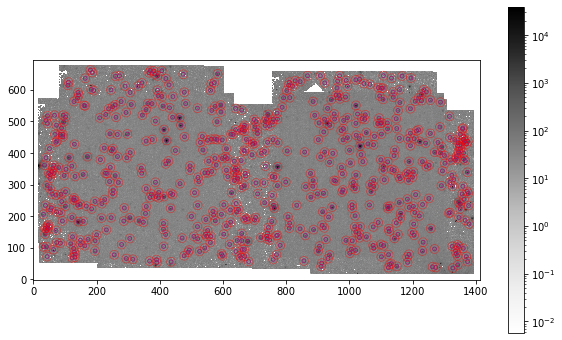

In [30]:
final_pos = np.transpose((final_data['xcenter'].value, final_data['ycenter'].value))
final_apertures = CircularAperture(final_pos, r=6.)
final_annuli = CircularAnnulus(final_pos, r_in=6., r_out=14.)
final_all_apers = [final_apertures, final_annuli]

plt.imshow(data, cmap='Greys', origin='lower', norm=norm, interpolation='nearest')
plt.colorbar()
final_apertures.plot(color='blue', lw=.75, alpha=.5)
final_annuli.plot(color='red', lw=.75, alpha=.5)
plt.gcf().set_size_inches(10, 6)

#plt.savefig('images/3p6um_4sigma_counts.png', dpi=300)

Estimating the local background in the annuli by finding the mean brightness within:

In [31]:
bkg_mean = final_data['aperture_sum_1'] / annuli.area
bkg_sum = bkg_mean * apertures.area
final_sum = final_data['aperture_sum_0'] - bkg_sum
final_data['residual_sum_mean'] = final_sum

#for col in final_data.colnames:
#    final_data[col].info.format = '%.8g'
print(final_data)

 id  xcenter   ycenter  aperture_sum_0 aperture_sum_1 residual_sum_mean
       pix       pix                                                   
--- --------- --------- -------------- -------------- -----------------
 12 1327.4473 35.911661      8478.4609       58726.32        -4734.9612
 14 1123.3365 37.157777      5804.9773      24588.348         272.59899
 15 1273.3191 37.641682      7155.7357      70357.911        -8674.7944
 18 1263.0964 39.632207      7991.2857      30179.302         1200.9426
 21  910.3288  40.83291      6110.9349       20298.73         1543.7208
 22 1149.9531 41.553642      20198.146      25427.829         14476.884
 26 1342.9128 45.770859      22348.105      36349.914         14169.375
 32 1127.5115 47.616697      9448.1562      25453.819          3721.047
 37 1132.3676 49.803702      11110.936       24214.98         5662.5659
 38 912.56694 51.583555      5726.6388      21381.769         915.74087
...       ...       ...            ...            ...           

Alternate method: better stats yay (sigma-clipped median in the annuli):

In [32]:
annulus_masks = final_annuli.to_mask(method='center') # note: exact would be overkill for local bkg estimation (read ap phot tutorial for explanation)

bkg_median = []
for mask in annulus_masks:
    annulus_data = mask.multiply(data)
    annulus_data_1d = annulus_data[mask.data > 0]
    _, median_sigclip, _ = sigma_clipped_stats(annulus_data_1d)
    bkg_median.append(median_sigclip)

bkg_median = np.array(bkg_median)
phot = aperture_photometry(data, final_apertures)
phot['annulus_median'] = bkg_median
phot['aper_bkg'] = bkg_median * final_apertures.area
phot['aper_sum_bkgsub'] = phot['aperture_sum'] - phot['aper_bkg']

for col in phot.colnames:
    phot[col].info.format = '%.8g'
print(phot)

 id  xcenter   ycenter  aperture_sum annulus_median  aper_bkg aper_sum_bkgsub
       pix       pix                                                         
--- --------- --------- ------------ -------------- --------- ---------------
  1 1327.4473 35.911661    8478.4609      81.136971 9176.3752      -697.91431
  2 1123.3365 37.157777    5804.9773      44.927704 5081.2036       723.77366
  3 1273.3191 37.641682    7155.7357      68.285847 7722.9473      -567.21166
  4 1263.0964 39.632207    7991.2857      55.484047 6275.0979       1716.1878
  5  910.3288  40.83291    6110.9349      39.856468 4507.6604       1603.2746
  6 1149.9531 41.553642    20198.146      48.400345   5473.95       14724.196
  7 1342.9128 45.770859    22348.105      71.040287 8034.4672       14313.638
  8 1127.5115 47.616697    9448.1562      44.587837 5042.7656       4405.3907
  9 1132.3676 49.803702    11110.936      45.939491 5195.6341       5915.3024
 10 912.56694 51.583555    5726.6388      41.117203 4650.2461   

### ^^ Only problem here is the star ids have now changed, should try and keep them consistent if possible

Trying to calculate the apparent magnitudes of each star (but they seem far too bright...):

I think the negative 'aper_sum_bkgsub's happen in crowded areas where the annulus counts another star as the background, so the bkg value is larger than the aperture sum, or where the star itself is so dim the bkg est is higher, or a mix of both. Does this mean I need a higher threshold or fwhm to rule out the dim boyos? Who knows

In [33]:
flux_zeropoint = 280.9    # from Reach et al 2005, section 5.4; for 3.6 band, = 280.9 +/- 4.1
counts_zeropoint = flux_zeropoint * exptime / fluxconv
negative_sums = []
phot['apparent_mag'] = float('NaN')   # idk why i have to fill the new column with NaNs first but hey ho it works

for i in range(0, len(phot)):
    if phot['aper_sum_bkgsub'][i] >= 0:
        phot['apparent_mag'][i] = 2.5 * math.log10(counts_zeropoint / phot['aper_sum_bkgsub'][i])
        #print(phot[:][i])
    else:
        negative_sums.append(phot['id'][i])

#for col in phot.colnames:
#    phot[col].info.format = '%.8g'
print(phot)
print(negative_sums)

 id  xcenter   ycenter  ...  aper_bkg aper_sum_bkgsub    apparent_mag   
       pix       pix    ...                                             
--- --------- --------- ... --------- --------------- ------------------
  1 1327.4473 35.911661 ... 9176.3752      -697.91431                nan
  2 1123.3365 37.157777 ... 5081.2036       723.77366  5.857859975123723
  3 1273.3191 37.641682 ... 7722.9473      -567.21166                nan
  4 1263.0964 39.632207 ... 6275.0979       1716.1878  4.920454894216056
  5  910.3288  40.83291 ... 4507.6604       1603.2746  4.994347158655566
  6 1149.9531 41.553642 ...   5473.95       14724.196 2.5867879472685393
  7 1342.9128 45.770859 ... 8034.4672       14313.638 2.6174918228734283
  8 1127.5115 47.616697 ... 5042.7656       4405.3907 3.8969058412551414
  9 1132.3676 49.803702 ... 5195.6341       5915.3024 3.5769245220543966
 10 912.56694 51.583555 ... 4650.2461       1076.3927 5.4269400061700654
...       ...       ... ...       ...             .

In [34]:
phot.write('outputs/phot_table_e1.txt', format='csv', overwrite=True)